# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data
from sklearn.model_selection import train_test_split

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

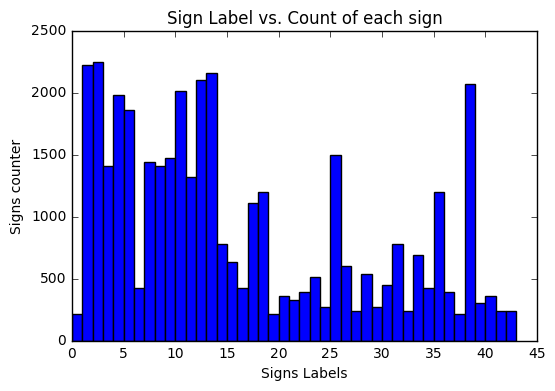

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import collections

# Visualizations will be shown in the notebook.
%matplotlib inline

chartprep = np.array(train['labels'])
chart_labels, chart_values = zip(*collections.Counter(chartprep).items())
plt.ylabel('Signs counter')
plt.xlabel('Signs Labels')
plt.bar(chart_labels, chart_values, 1 )
plt.title('Sign Label vs. Count of each sign')
plt.show()


One image sample:
Image Label:  3


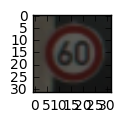

In [4]:
print("One image sample:")
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
print("Image Label: ",y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Original X_train shape = (39209, 32, 32, 3)
Original image shape from X_train = (32, 32, 3)
Shape from a processed image = (32, 32)
Processing...
X_train shape after reshaping = (39209, 32, 32, 1)
Shape from a processed image after reshaping = (32, 32, 1)


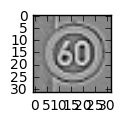

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import cv2


def preproc(x):
    kernel_size=1
    a = 0.1
    b = 0.9
    grayescala_min = 0
    grayescala_max = 255
    
    gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

    final=a+(((blur_gray-grayescala_min)*(b-a))/(grayescala_max-grayescala_min))   
    
    laplacian = cv2.Laplacian(final,cv2.CV_64F)
    
    #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
    #cl1 = clahe.apply(blur_gray)
    
    #go with laplacian, if NOK, try just blur_gray, 3rd option go with CLAHE
    
    #return final
    return laplacian


plt.figure(figsize=(1,1))
plt.imshow(preproc(image), cmap='Greys_r')


def fixshape(data,n):
    new=np.zeros([n,32,32])
    for i in range(n):
        new[i]=preproc(data[i])
    
    return new.reshape((-1, 32, 32, 1)).astype(np.float32)


print("Original X_train shape =",X_train.shape)
print("Original image shape from X_train =",image.shape)
print("Shape from a processed image =",preproc(image).shape)

print("Processing...")
X_train_processed=fixshape(X_train,len(X_train))
X_test_processed =fixshape(X_test ,len(X_test))

print("X_train shape after reshaping =",X_train_processed.shape)
print("Shape from a processed image after reshaping =",X_train_processed[0].shape)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

Answer: I've started by applying the same principles as in project one (grayscale + blur + cannyedge), but after seeing the outcome I was not satisfied, specially with dark images, where the blur+canny just seem to make the image worse.
I've applied image normalization as suggested.

Techniques tried but without major improvements (trail & error):
adaptive thresholding
otsus thresholding
erosion/dilation/opening/closing
gradient
sobel
histogram equ
fast denoise

after trial & error I had a short list of
1.grayscale+blur+laplacian gradient
2.grayscale+blur
3.grayscale+blur+CLAHE

I decided to go with option 1 because it seems it's producing clearer images.

Data sets have been reshaped after processing images.


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train_processed, X_validation, y_train, y_validation = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=57)
n_train = len(X_train_processed)
n_valid=len(X_validation)

image_shape = X_train_processed[0].shape

print("Number of training examples =", n_train)

print("Number of validation examples =",n_valid)

print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Answer: I kept the same testing data.
The validation data set was created by splitting the training data (80/20) as suggested in the project 2 kickoff video.


In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

X_train_processed, y_train = shuffle(X_train_processed, y_train)

#Original parameters (1st submission):
#EPOCHS=100
#BATCH_SIZE=64

#Edit S2: After the first review it was suggested to reduce the EPOCHS.
#Edit S2: New EPOCHS=20, BATCH_SIZE=128 (increased from 64 to 128, due to better performance on Keras lab with 128 instead of 64)

EPOCHS = 20
BATCH_SIZE = 128

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, 0.5)
    #EDIT: after revision number 1, I've added a dropout to try to prevent overfitting

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


Answer: I've used LeNet, exactly like in the lab.

Input = 32x32x1 ->
Layer 1: Convolutional. Output = 28x28x6. ->
Relu Activation ->
Max Pooling. Input = 28x28x6. Output = 14x14x6. ->
Layer 2: Convolutional. Output = 10x10x16. ->
Relu Activation ->
Max Pooling. Input = 10x10x16. Output = 5x5x16. ->
Flatten. Input = 5x5x16. Output = 400. ->
So a FCL can be applied: Layer 3: Input = 400. Output = 120. ->
Relu Activation ->
Layer 4: Fully Connected. Input = 120. Output = 84 ->
Relu Activation ->
Dropout (50%) ->
Layer 5: Fully Connected. Input = 84. Output = 43 (number of classes)

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_processed, y_train = shuffle(X_train_processed, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        print()
        
    saver.save(sess, 'lenet')
    #print("Model saved")
    

def check_training(X_test_processed,y_test):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        test_accuracy = evaluate(X_test_processed, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

#do it only once...
check_training(X_test_processed,y_test)
    
                       
    


Training...

EPOCH 1 ...
Validation Accuracy = 0.459

EPOCH 2 ...
Validation Accuracy = 0.697

EPOCH 3 ...
Validation Accuracy = 0.793

EPOCH 4 ...
Validation Accuracy = 0.830

EPOCH 5 ...
Validation Accuracy = 0.851

EPOCH 6 ...
Validation Accuracy = 0.891

EPOCH 7 ...
Validation Accuracy = 0.903

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 10 ...
Validation Accuracy = 0.925

EPOCH 11 ...
Validation Accuracy = 0.931

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.946

EPOCH 14 ...
Validation Accuracy = 0.937

EPOCH 15 ...
Validation Accuracy = 0.947

EPOCH 16 ...
Validation Accuracy = 0.956

EPOCH 17 ...
Validation Accuracy = 0.952

EPOCH 18 ...
Validation Accuracy = 0.955

EPOCH 19 ...
Validation Accuracy = 0.956

EPOCH 20 ...
Validation Accuracy = 0.956

Test Accuracy = 0.900


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


Answer:
I have used AdamOptimizer as the optimizer (same as the LeNet lab).
Learning rate set equal to 0.001.
Batch size as 128
Epochs set to 20.

Normal distribution paramenters set the same as lab:
mu = 0
sigma = 0.1

Validation/Test accuracy: around 0.9 (I'm ok with these results)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

#edit: (*) lines were added after review 1.

Answer: Since LeNet had a great record for this kind of problem I used it as the basis.

(*) I didn't try any other type of architecture since LeNet is suitable for images classification.
(*) convolutional layers were used to serve as "feature detectors" for the images (shapes,colors, etc.)
(*) Relu activations were used since they are the simplest form of activation/adding non-linearity to a network, and I was confortable using them after the lectures and the labs.

Parameters were set after trial and error (having the labs always as a starting point)

(*) EPOCHS and BATCH_SIZE were changed respectively from 100 - >20 & 64 -> 128, after review 1 feedback and Keras lab try and error, and having better results with these parameters.

(*) after review 1 I've included a dropout layer to reduce overfitting the model and to try to have a better record on the new images.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Original image
(260, 263)


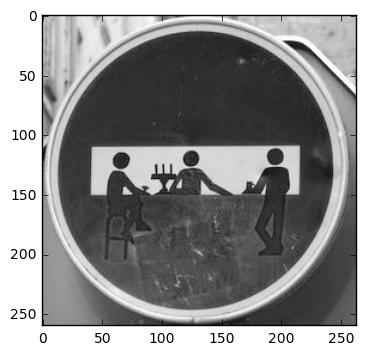

Image after preprocessing
(32, 32)


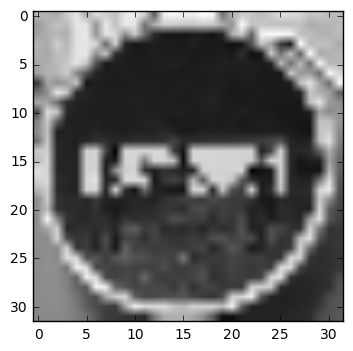

Original image
(127, 146)


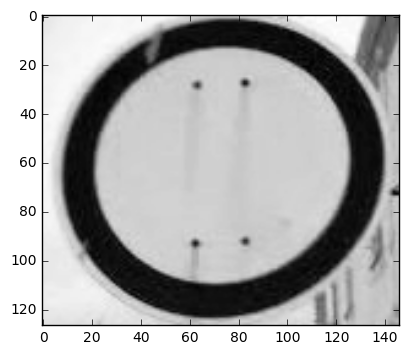

Image after preprocessing
(32, 32)


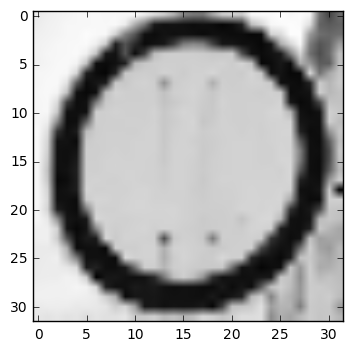

Original image
(183, 183)


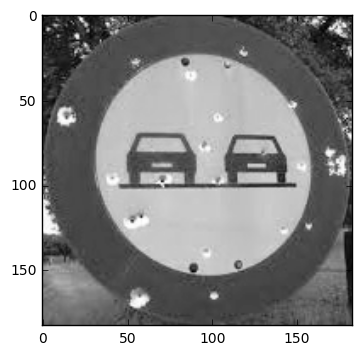

Image after preprocessing
(32, 32)


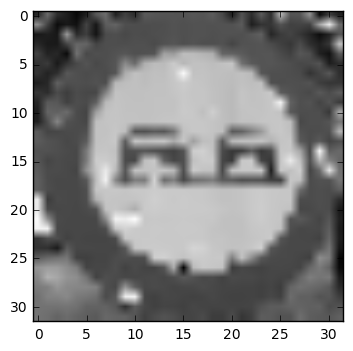

Original image
(334, 353)


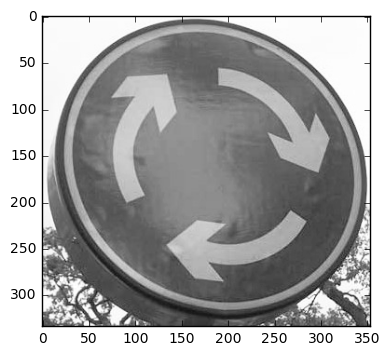

Image after preprocessing
(32, 32)


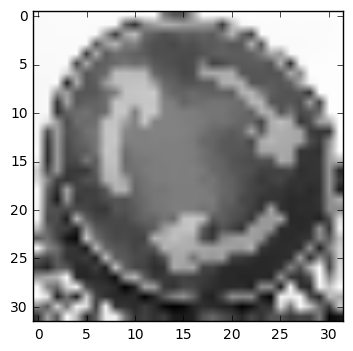

Original image
(302, 302)


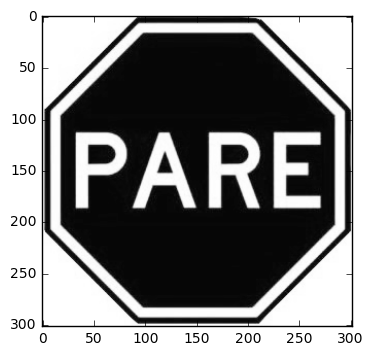

Image after preprocessing
(32, 32)


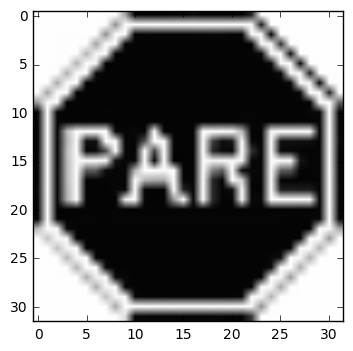

Original image
(458, 406)


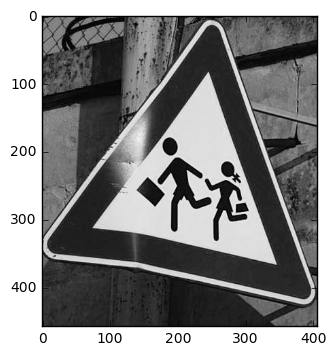

Image after preprocessing
(32, 32)


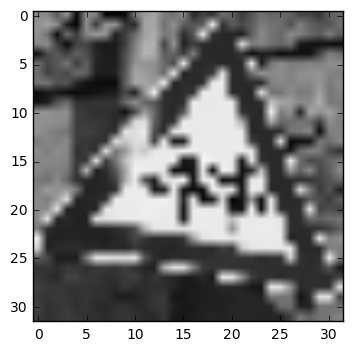

Original image
(90, 93)


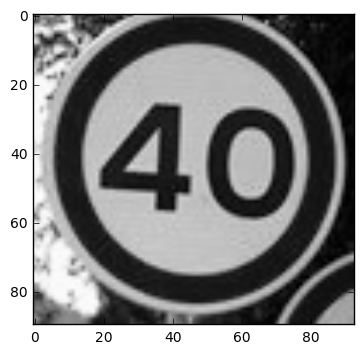

Image after preprocessing
(32, 32)


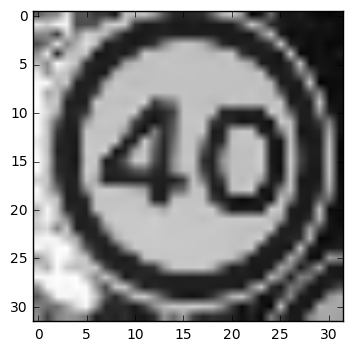

(7, 32, 32, 1)


In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_images_and_proc(folder):
    filelist=os.listdir(folder)
    images=np.zeros((len(filelist),32,32))
    count=0
    
    for i in filelist:
        singleim=os.path.join(folder,i)
        im = cv2.imread(singleim,cv2.COLOR_RGB2GRAY)
        im=cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        print("Original image")
        print(im.shape)
        plt_img = plt.imshow(im,cmap='Greys_r')
        plt.show()
        
        a = 0.1
        b = 0.9
        grayescala_min = 0
        grayescala_max = 255
        blur_gray = cv2.GaussianBlur(im,(1, 1), 0)
        final=a+(((blur_gray-grayescala_min)*(b-a))/(grayescala_max-grayescala_min))   
        im2 = cv2.resize(final, (32, 32),interpolation = cv2.INTER_CUBIC) #resize to 32x32xY
        
        print("Image after preprocessing")
        print(im2.shape)
        plt_img = plt.imshow(im2,cmap='Greys_r')
        plt.show()
        
        images[count] = im2
        count += 1
    return images.reshape((-1,32,32,1)).astype(np.float32)


path_images1= "OsMeusSinaisCropped/"

myimages=load_images_and_proc(path_images1)
print(myimages.shape)



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



Answer:
Image1: No entry (it might be difficult for the classifier since it has graffiti in the middle)
Image2: No vehicle (it might be difficult to classify since there are extra "round features": 4 x holes)
Image3: No passing (it might be difficult to classify since there are extra "round features": several bullet holes)
Image4: British/LHD roundabout (it might be difficult to classify since the arrows are clockwise instead of anti-clockwise arrows used in Germany's signs) 
Image5: Stop sign (altough it has the same shape of a "normal" stop sign, it might be difficult for the classifier to recognize since stop is written in portuguese (pare).
Image6: Children crossing (it might be difficult because the sign is slightly bended and the photo has some reflexion on that area)
Image7: Speed Limit 40km/h (it will be difficult for the model to classify this one since is not included in the training set, and I am curious to see if my classifier recognizes somehow the shape and color and returns any speed limit type sign).

I chose these images because each one of them have a particularity that can be seen as a real world test.
I thought that if my model could recognize these signs would be robust enough.


In [11]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


mylabels = np.array([17,15,9,40,14,28,0])

init = tf.global_variables_initializer()
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(init)


with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    new_run1 = sess.run(tf.nn.softmax(logits), feed_dict={x: myimages})
    
counter=1
for i in range(len(mylabels)):
    print("Image: {}, Model prediction: {}, Label is: {}".format(counter,np.argmax(new_run1[counter-1]),mylabels[counter-1]))
    counter+=1
    
#check_training(myimages,mylabels)


Image: 1, Model prediction: 33, Label is: 17
Image: 2, Model prediction: 17, Label is: 15
Image: 3, Model prediction: 17, Label is: 9
Image: 4, Model prediction: 17, Label is: 40
Image: 5, Model prediction: 9, Label is: 14
Image: 6, Model prediction: 17, Label is: 28
Image: 7, Model prediction: 14, Label is: 0


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Answer: 
After introducing a 50% dropout + reducing number of epochs and changing the batch size the model still got 0% of the results right.

#Original comment as first submission:
No! :( my model performs poorly... 0%... not even the STOP sign it got right ... I tried the model with "raw images" and the accuracy was 0%, I later cropped the original images so they would only represent the traffic sign and the result was the same: 0%. These last set of cropped images were the ones included in the submission.

In [12]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


print(session.run(tf.nn.top_k(new_run1, 5)))
print("Image labels: ",mylabels)



TopKV2(values=array([[  9.99959111e-01,   4.01937759e-05,   6.67677682e-07,
          1.00529196e-09,   4.25906740e-11],
       [  1.00000000e+00,   5.67141604e-16,   1.23173356e-17,
          3.51328711e-18,   3.51029093e-23],
       [  9.99987125e-01,   6.98674512e-06,   2.94990537e-06,
          2.13827320e-06,   7.03649846e-07],
       [  6.96421862e-01,   3.03578168e-01,   2.72848272e-11,
          1.09944118e-12,   1.00518530e-12],
       [  4.96376723e-01,   2.83821255e-01,   2.09178507e-01,
          1.06235184e-02,   7.77829889e-09],
       [  1.00000000e+00,   4.15827664e-18,   3.16141130e-18,
          5.61345887e-21,   6.74263523e-23],
       [  9.99780118e-01,   2.19868656e-04,   2.30075247e-11,
          8.79799909e-14,   3.15082950e-20]], dtype=float32), indices=array([[33, 20, 39, 17,  3],
       [17,  1, 33,  2, 14],
       [17,  0,  3,  1, 14],
       [17,  6, 13, 14,  2],
       [ 9,  2,  3, 17,  5],
       [17,  6, 42, 41, 14],
       [14, 17,  1, 38,  2]], dtype=in

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Answer: The results are similar to the first original submission. In only 1 out of 6 images the correct label is in top 5. i.e.: for image 1 the correct label is 17 and label 17 is in the 4th position with a bit over 0%. It seems that this time the model is "much more certain" of its predictions having some top values close to 100%! But this didn't translate in a more accurate model when applied to new images.


#Original comment: In only 1 out of 6 images the correct label is in top 5. i.e: for image 5 the correct label is 14 and label 14 is in the second position with 30%. For the last image label 2 is also in the second position with 10% but no other "Speed limit family" is in top5.

Future investigation: Why this happens? Judging from the model accuracy within the new images, the model is overfitted to the training set. 
Can this be improved by generating more training data and balance the training set so all the classes have similar frequency?

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.